In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("climate_change_dataset.csv")

df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


## 1. Data Understanding

In [17]:
df.shape

(1000, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [19]:
df.describe()


,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [20]:
df.columns


Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

<Axes: xlabel='Year', ylabel='Count'>

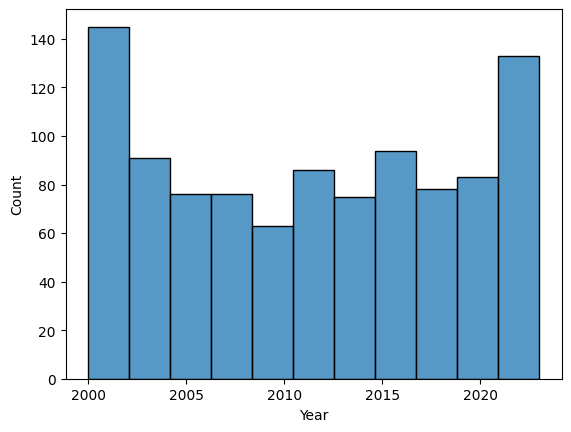

In [21]:
sns.histplot(df['Year'])

## 2. Data Preparation

In [23]:
df.isnull().sum()

Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df_filtered = df[df["Year"] >= 2000]


In [26]:
df_yearly = df_filtered.groupby("Year").mean(numeric_only=True).reset_index()

print(df_yearly.head())


   Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2000             20.501887                    11.224528   
1  2001             20.117073                     9.929268   
2  2002             21.433333                     9.933333   
3  2003             18.219512                    11.085366   
4  2004             18.804000                    10.000000   

   Sea Level Rise (mm)  Rainfall (mm)    Population  Renewable Energy (%)  \
0             2.939623    1687.735849  6.246580e+08             27.566038   
1             3.273171    1756.902439  6.629403e+08             25.658537   
2             2.952941    1928.745098  5.781645e+08             25.860784   
3             2.934146    1826.707317  6.698096e+08             26.587805   
4             2.790000    1713.920000  6.925443e+08             29.470000   

   Extreme Weather Events  Forest Area (%)  
0                7.830189        41.890566  
1                7.682927        42.217073  
2                7.058824    

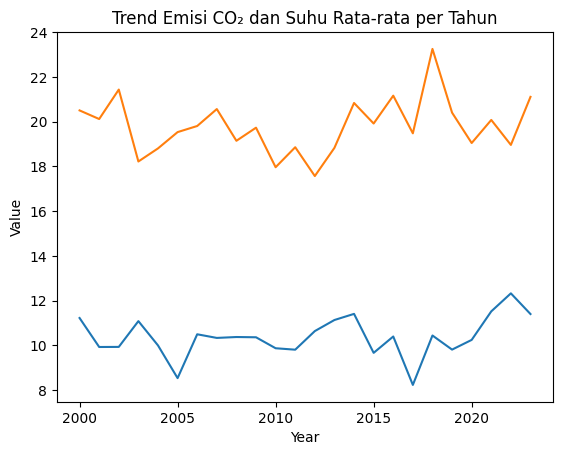

In [27]:
plt.figure()
plt.plot(df_yearly["Year"], df_yearly["CO2 Emissions (Tons/Capita)"])
plt.plot(df_yearly["Year"], df_yearly["Avg Temperature (°C)"])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Trend Emisi CO₂ dan Suhu Rata-rata per Tahun")
plt.show()


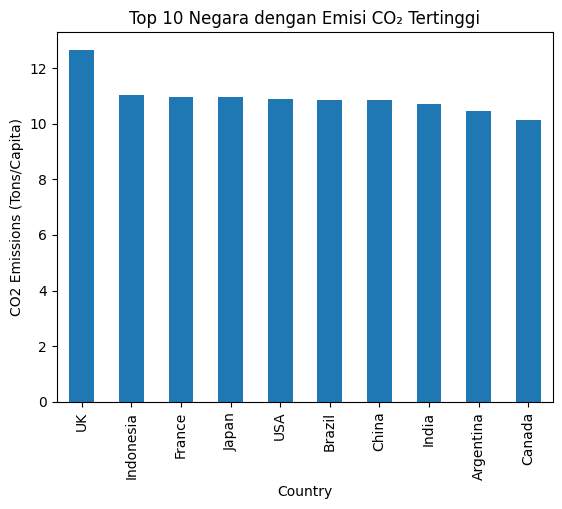

In [28]:
country_emission = df_filtered.groupby("Country")["CO2 Emissions (Tons/Capita)"].mean().sort_values(ascending=False).head(10)

plt.figure()
country_emission.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.title("Top 10 Negara dengan Emisi CO₂ Tertinggi")
plt.show()


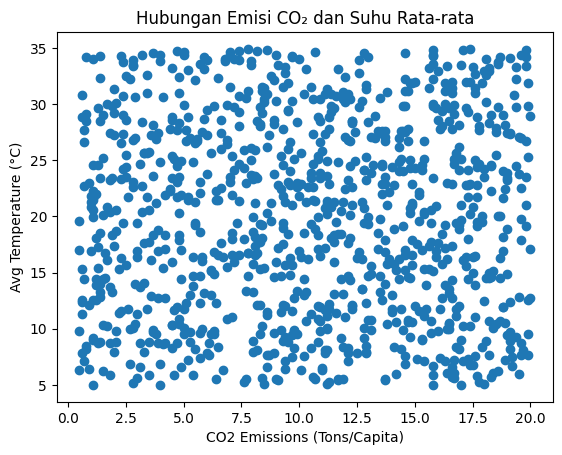

In [29]:
plt.figure()
plt.scatter(df_filtered["CO2 Emissions (Tons/Capita)"],
            df_filtered["Avg Temperature (°C)"])
plt.xlabel("CO2 Emissions (Tons/Capita)")
plt.ylabel("Avg Temperature (°C)")
plt.title("Hubungan Emisi CO₂ dan Suhu Rata-rata")
plt.show()


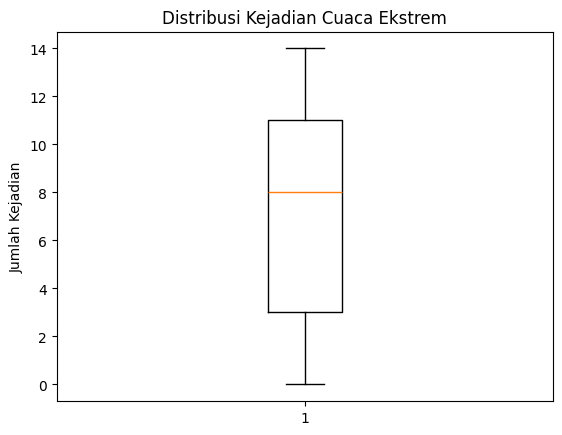

In [30]:
plt.figure()
plt.boxplot(df_filtered["Extreme Weather Events"])
plt.ylabel("Jumlah Kejadian")
plt.title("Distribusi Kejadian Cuaca Ekstrem")
plt.show()


In [31]:
kpi = {
    "Rata-rata Suhu": df_filtered["Avg Temperature (°C)"].mean(),
    "Rata-rata Emisi CO2": df_filtered["CO2 Emissions (Tons/Capita)"].mean(),
    "Rata-rata Cuaca Ekstrem": df_filtered["Extreme Weather Events"].mean()
}

print(kpi)


{'Rata-rata Suhu': 19.8831, 'Rata-rata Emisi CO2': 10.425799999999999, 'Rata-rata Cuaca Ekstrem': 7.291}
